# Regresion Logistica

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, LearningCurveDisplay
import matplotlib.pyplot as plt

## Cargar los datos procesados

In [2]:
df = pd.read_csv('output.csv')

## Encontrar los Mejores Hiperparametros

Dividir los datos en las variables de entrada y salida

In [3]:
y = df['y']
X = df.drop('y', axis=1)

In [13]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
45206     True
45207     True
45208     True
45209    False
45210    False
Name: y, Length: 45211, dtype: bool

In [14]:
X

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,1.606965,False,0.256419,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
1,0.288529,False,-0.437895,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
2,-0.747384,False,-0.446762,True,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
3,0.571051,False,0.047205,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,-0.747384,False,-0.447091,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,False,-0.176460,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
45207,2.831227,False,0.120447,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
45208,2.925401,False,1.429593,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
45209,1.512791,False,-0.228024,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [4]:
logReg = LogisticRegression()

In [17]:
param_grid = {
    'penalty' : ['none', 'l1', 'l2', 'elasticinet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter' : [100, 1000, 2500, 5000]
}

print(param_grid)

{'penalty': ['none', 'l1', 'l2', 'elasticinet'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'max_iter': [100, 1000, 2500, 5000]}


In [6]:
clf = GridSearchCV(logReg, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)

In [ ]:
best_clf = clf.fit(X, y)

In [8]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')

In [ ]:
print(f'La mejor exactitud: {best_clf.score(X, y):.3f}')

## Curva de Aprendizaje

In [11]:
logReg = LogisticRegression(C = 0.0001, penalty = 'l1', solver = 'liblinear')

c:\Users\Usuario\Desktop\ProyectoFinalProgramacion\venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuario\Desktop\ProyectoFinalProgramacion\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuario\Desktop\ProyectoFinalProgramacion\venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Usuario\Des

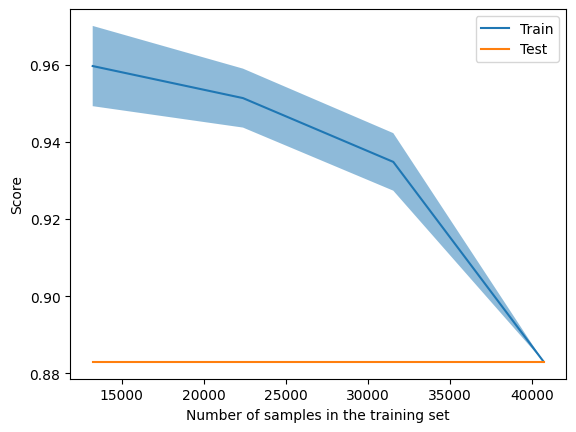

In [16]:
LearningCurveDisplay.from_estimator(logReg, X, y, cv = 10)


## Diagnostico

En nuestra curva de aprendizaje, podemos notar que nuestro modelo a medida que aumenta el tamaño de los datos de entrenamiento este poco a poco esta generalizando mas los datos, es decir, la distancia entre las curvas de aprendizaje y validación es cada vez menor, sin embargo, a su vez vemos que la curva de validacion se quedo estancada en un valor, y esta no se mueve (o al menos no se puede apreciar el movimiento de esta).
<br>
Una de las primeras conclusiones que podemos sacar es que nuestro modelo no sufre de overfitting o underfitting, esto debido a que nuestras curvas de aprendizaje convergen a un valor y al final no se puede apreciar una diferencia entre estas.
<br>
El hecho de que la curva de validacion no se mueva puede deverse a cosas como que el modelo es muy simple y no es capaz de aprender mas sobre los datos, o que los datos que tenemos no son suficientes para poder predecir nuestras variables adecuadamente.
<br>
<br>
Recomendaciones:
* Recolectar una mayor cantidad de datos, los cuales no dependan de contacto previo con los clientes, como puede ser, cantidad de productos financieros que ha tenido en su vida, estados financieros de personas allegadas a este, etc; esto debido a que debido a lo simple y generales que son nuestros datos finales que escogimos, estos no puedan estar dando un patron (o tal vez puede ser el siguiente punto) muy claro, o no estan dando informacion suficiente para poder realizar una prediccion mas acertada.
* Probar con otros modelos de clasificacion mas complejos, puede ser que nuestro modelo de regresion logistica sea demasiado simple para poder capturar los patrones que tienen nuestros datos, si esto fuera cierto, haria que no importa cuanta mayor cantidad de datos le metamos, el porcentaje de aciertos (de los datos de validacion) no aumentaria.

En resumen de las recomendaciones para este modelo, serian hacer una mayor recoleccion de caracteristicas de los clientes e intentar usar otros modelos mas complejos.

`Nota: cabe recalcar que cuando digo recolectar mas caracteristicas, me refiero a mas columnas, no necesariamente aumentar la cantidad de filas, aunque por obvias razones, mientras mas filas mejor.`